In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

from cara_count import CaRaCount

# Load and Visualiza data

(710, 6)
(5420, 6)


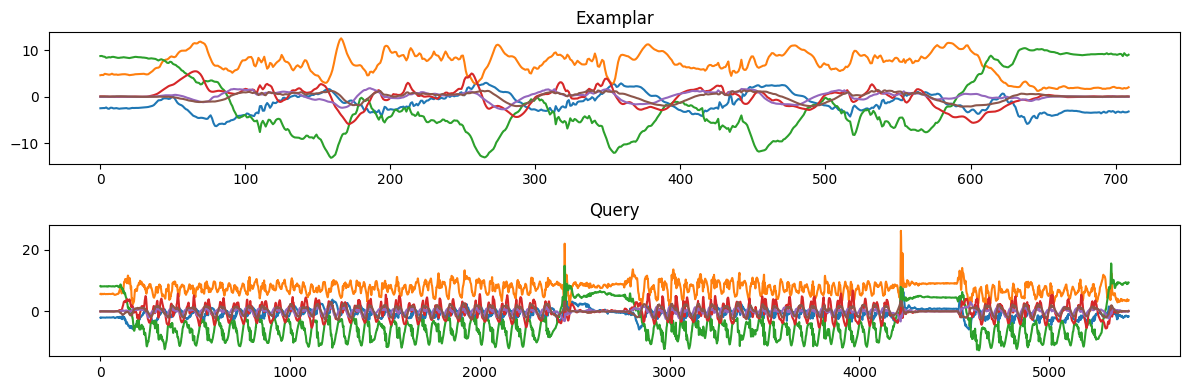

In [2]:
examplar_path = "assest/examplar_5.csv"
examplar_cnt = int(examplar_path.split(".")[0].split("_")[1])
examplar = pd.read_csv(examplar_path, header=None).values[:, 1:]
print(examplar.shape)

query_path = "assest/query_60.csv"
query_cnt = int(query_path.split(".")[0].split("_")[1])
query = pd.read_csv(query_path, header=None).values[:, 1:]
print(query.shape)


fig, axes = plt.subplots(2, 1, figsize=(12, 4))
axes[0].plot(examplar)
axes[0].set_title("Examplar")

axes[1].plot(query)
axes[1].set_title("Query")

plt.tight_layout()
plt.show()

# Construct CaRaCount

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_phase = 4

cara_count = CaRaCount(
    num_phase=num_phase,
    examplar=examplar,
    examplar_cnt=examplar_cnt, 
    query=query,
    device=device
)

print("CaRaCount Parameters")
print(f"  • Window size: {cara_count.window_size}")
print(f"  • Stride: {cara_count.stride}")
print(f"  • Examplar shape: {cara_count.examplar_wd.shape}")
print(f"  • Query shape: {cara_count.query_wd.shape}") 
print(f"  • Target sequence: {cara_count.target_seq}")

/home/ducnd/projects/bbvisual/CaRaCount/cara_count.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(examplar_wd, dtype=torch.float32)
/home/ducnd/projects/bbvisual/CaRaCount/cara_count.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(query_wd, dtype=torch.float32)


CaRaCount Parameters
  • Window size: 107
  • Stride: 53
  • Examplar shape: torch.Size([1, 6, 52, 107])
  • Query shape: torch.Size([1, 6, 408, 107])
  • Target sequence: tensor([5, 5, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 5, 5])


# Fit Examplar sequence

Iter 199/2000: loss = 0.0868
Iter 399/2000: loss = 0.1811
Done fitting examplar at iter: 508 | ctc loss 0.04659092798829079
[5, 5, 5, 0, 5, 5, 1, 1, 2, 3, 3, 3, 4, 1, 1, 2, 2, 3, 3, 3, 4, 4, 1, 2, 2, 3, 3, 4, 4, 0, 1, 2, 2, 3, 3, 4, 4, 1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 5, 0, 0, 5]


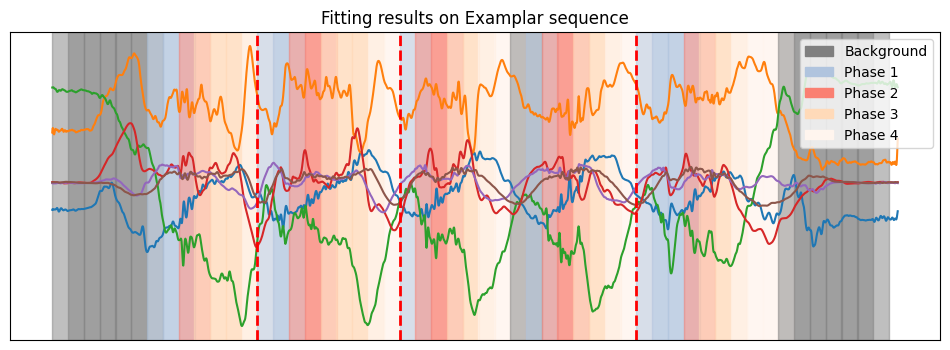

In [4]:
cara_count.fit(verbose=200)
print(cara_count.examplar_preds)
cara_count.visualize()

# Predict number of repetition on Query sequence

Pred: 57 | GT: 60 | MAE: 3


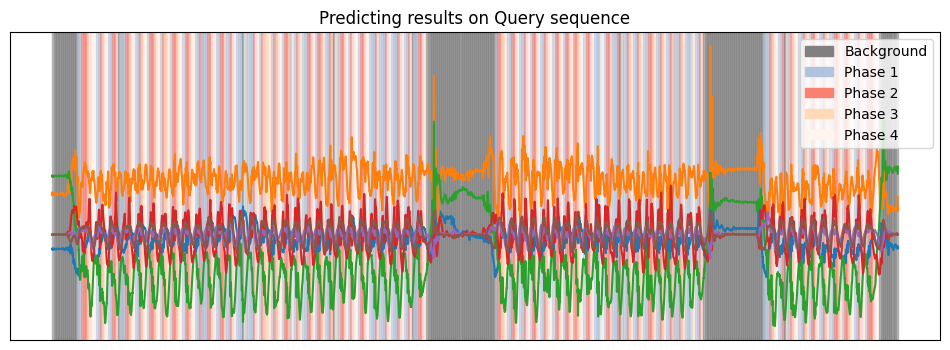

In [5]:
pred_cnt = cara_count.predict()
print(f"Pred: {pred_cnt} | GT: {query_cnt} | MAE: {abs(query_cnt-pred_cnt)}")
cara_count.visualize(examplar=False)